**Plan**

**1. Introduction to TensorFlow Datasets**

**2. Data preprocessing techniques**

**3. Data augmentation**


**<h2> Introduction to TensorFlow Datasets</h2>**

TensorFlow Datasets (TFDS) is a collection of ready-to-use datasets for use with TensorFlow, JAX, and other Machine Learning frameworks. It provides a simple way to access a wide variety of datasets, including images, text, audio, and more.

**1. Loading a dataset from TensorFlow Datasets**

In [1]:
import tensorflow_datasets as tfds

# Load the MNIST dataset
ds, info = tfds.load('mnist', with_info=True, as_supervised=True)
train_ds, test_ds = ds['train'], ds['test']

print(info)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/incomplete.0IM96B_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
    

**2. Exploring the dataset**

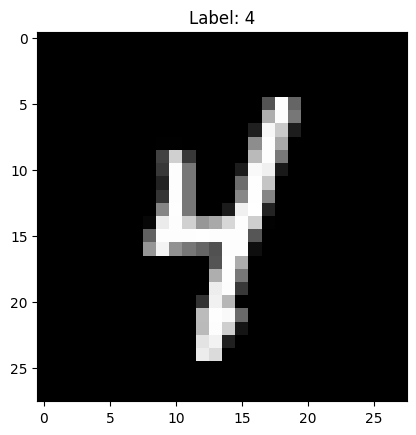

In [3]:
# Iterate over the dataset and display some examples
import matplotlib.pyplot as plt

for example in train_ds.take(1):
    image, label = example
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {label.numpy()}')
    plt.show()

**3. Splitting a dataset**

In [4]:
# Load the dataset with a split
train_ds, val_ds = tfds.load('mnist', split=['train[:80%]', 'train[80%:]'], as_supervised=True)

print(f'Training set size: {len(list(train_ds))}')
print(f'Validation set size: {len(list(val_ds))}')

Training set size: 48000
Validation set size: 12000


**<h2>Data Preprocessing Techniques</h2>**

Data preprocessing is a crucial step in the machine learning pipeline. It involves transforming raw data into a suitable format before feeding it into a machine learning model. Common preprocessing steps include normalization, resizing, and encoding.

**1. Normalization**

In [5]:
import tensorflow as tf

# Normalize pixel values to be between 0 and 1
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)

**2. Resizing**

In [6]:
# Resize images to 32x32
def resize_img(image, label):
    image = tf.image.resize(image, [32, 32])
    return image, label

train_ds = train_ds.map(resize_img)
test_ds = test_ds.map(resize_img)

**3. One-hot Encoding**

In [7]:
# One-hot encode the labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=10)
    return image, label

train_ds = train_ds.map(one_hot_encode)
test_ds = test_ds.map(one_hot_encode)

**4. Combining Preprocessing Steps:**

In [ ]:
# Combine multiple preprocessing steps
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, [32, 32])
    label = tf.one_hot(label, depth=10)
    return image, label

train_ds = train_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

**<h2>Data Augmentation</h2>**

Data augmentation is a technique to artificially increase the size of a training dataset by creating modified versions of images in the dataset. This helps to improve the generalization ability of a model.

**1. Basic Augmentation**

In [ ]:
# Flip images horizontally
def augment(image, label):
    image = tf.image.flip_left_right(image)
    return image, label

train_ds = train_ds.map(augment)

**2. Random Rotation and Zoom**

In [ ]:
# Rotate and zoom images
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2)
    return image, label

train_ds = train_ds.map(augment)

**3. Using tf.image Methods:**

In [ ]:
# Use tf.image methods for augmentation
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image, label

train_ds = train_ds.map(augment)

**Combining Preprocessing and Augmentation:**

In [ ]:
# Combine preprocessing and augmentation steps
def preprocess_and_augment(image, label):
    # Preprocessing
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, [32, 32])
    label = tf.one_hot(label, depth=10)

    # Augmentation
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)

    return image, label

train_ds = train_ds.map(preprocess_and_augment)